<a href="https://colab.research.google.com/github/solstice-janvi/DataScience_practice/blob/main/credit_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("bankloans.csv")
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
df.isnull()

In [8]:
print(df['default'].value_counts())
df = df.dropna(subset=['default'])
X = df.drop(columns= ['default'])
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

default
0.0    517
1.0    183
Name: count, dtype: int64


In [15]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(sampling_strategy=0.5, random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("before SMOTE:",Counter(y_train))
print("after SMOTE:",Counter(y_train_resampled))

before SMOTE: Counter({0.0: 415, 1.0: 145})
after SMOTE: Counter({0.0: 415, 1.0: 207})


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       102
         1.0       0.74      0.45      0.56        38

    accuracy                           0.81       140
   macro avg       0.78      0.69      0.72       140
weighted avg       0.80      0.81      0.79       140



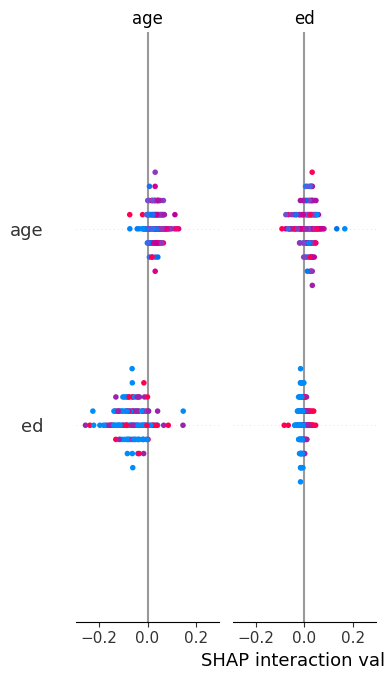

In [13]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)

In [14]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print(f"AUC-ROC Score: {auc:.3f}")

AUC-ROC Score: 0.819
